SAMUELE BATTISTELLA 31/1/24

ESERCIZIO D'ESAME SUI CONTAGI COVID: REGIONE FVG



Parte 1: Analisi dell'Andamento dei Nuovi Contagi
1. Scaricare il dataset dei contagi COVID-19 dal repository della Protezione Civile.
2. Graficare l'andamento dei nuovi contagi giornalieri (flag 'nuovi_positivi') per la regione prestabilita: FVG

Come prima cosa importo tutte le librerie necessarie per svolgere l'analisi dati rischiesta sui contagi covid-19. I dati sono stati estrapolati dal file denominato 'covid_dati.csv' e inseriti in un Dataframe. Quest'ultimo è stato fatto in modo che contenesse le sole colonne necessarie per il nostro scopo.

In [241]:
import numpy as np
import matplotlib.pyplot as mpl
import pandas as pd
import math as mt

In [378]:
datatot = pd.read_csv('covid_dati.csv',index_col= 'data', parse_dates=True,  sep=',') #lettura di tutti i dati
data1 = datatot[['denominazione_regione','nuovi_positivi']]     #selezione colonne giuste
#la data è l'indice della tabella
#nel grafico avrò sull'asse orizzontale l'indice della tabella--> quindi la data

È stato chiesto di analizzare solamente i dati dei nuovi contagi giornalieri riguardanti la regione Friuli-Venezia-Giulia. Per fare ciò, a partire dal database iniziale, è stato creato uno più compatto, in modo tale che esso contenga solamente i dati utili per svolgere l'analisi richiesta:


In [243]:
for i , (reg , valori) in enumerate (data1.groupby('denominazione_regione')):
    if reg== 'Friuli Venezia Giulia':  
        dati1_FVG = valori.drop(['denominazione_regione'], axis=1)   #tolgo dal mio dataframe la colonna del nome delle regioni

#print(valori)

Come prima cosa, si è deciso di stampare a schermo e graficare l'insieme dei dati filtrati, per farsi una prima idea su come affrontare il problema. Nel grafico qui sotto sono presenti i nuovi contagi in funzione della data:

<Axes: xlabel='data'>

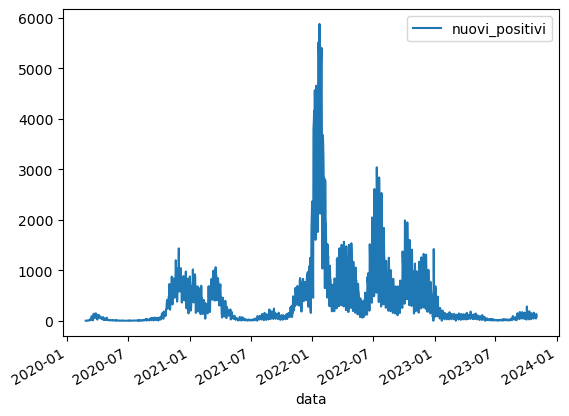

In [244]:
dati1_FVG.plot()  

In [245]:
print (dati1_FVG)

                     nuovi_positivi
data                               
2020-02-24 18:00:00               0
2020-02-25 18:00:00               0
2020-02-26 18:00:00               0
2020-02-27 18:00:00               0
2020-02-28 18:00:00               0
...                             ...
2023-10-28 17:00:00              71
2023-10-29 17:00:00              63
2023-10-30 17:00:00              41
2023-10-31 17:00:00             133
2023-11-01 17:00:00              80

[1347 rows x 1 columns]






Parte 2: Implementazione dei Modelli Epidemiologici.

Scrivere delle funzioni in Python per implementare:  

● La funzione logistica

● La funzione di Gompertz

● I nuovi contagi giornalieri predetti dalle due funzioni (la differenza dei contagi predetti
tra il giorno $i+1$ ed il giorno $i$).

● Utilizzare queste funzioni per modellare l'andamento dei nuovi contagi, analizzando
come i contagi cambiano al variare dei parametri di queste funzioni.


In [246]:
def logistica(N_tot ,k, t0, t):
    logi= (N_tot)/ (1 + np.exp( (-k)*(t-t0)) )
    return logi

In [247]:
def gompertz (N_tot, k, t0, t):
    esp1= np.exp( (-k)*(t-t0))
    esp2= np.exp( (  (-1)*np.log(N_tot)) * esp1 )
    gomp= N_tot * esp2
    return gomp

In [248]:
def new_logistica(N_tot, k, t0, t):
    nuovi_logi = np.diff(logistica(N_tot, k, t0, t))   #calcola la differenza tra due valori successivi
    return nuovi_logi                                                            

In [249]:
def new_gompertz(N_tot, k, t0, t):
    nuovi_gomp = np.diff(gompertz(N_tot, k, t0, t))
    return nuovi_gomp

È importante notare che, così facendo, se limito l'analisi ad un sottoinsieme specifico di dati si perde l'ultimo valore quando si utilizza le funzioni 'new_logistica' e 'new_gompertz'. Questa è la causa del fatto che, nel corso del programma, si è definito più volte il vettore 't' contente l'insieme di numeri progressivi che rappresentano le giornate analizzate: questo per far sì che le dimensioni degli array conicidano per ottenerne poi il grafico.

Innanzitutto è bene verificare che le funzioni definite sopra rispettano l'andamento desiderato. Per far ciò si è deciso di graficarle: quello che ci si aspetta è che le funzioni 'logistica' e 'gompertz' siano crescenti in quanto il numero totale di contagi non può diminiure col passarre del tempo (infatti non sono amessi valori negativi dei nuovi contagi giornalieri). Nei grafici qui sotto sono quindi rappresentate queste due funzioni:

In [389]:
#definisco il valore dei parametri per le due funzioni:
kl=0.038
kg=0.026
t0l=740
t0g=590

#definsico due nuovi array nulli
lo = np.zeros(1347)
go = np.zeros(1347)

#calcolo la somma dei contagi totali 
sumtot=dati1_FVG["nuovi_positivi"].sum()
print("la somma dei nuovi contagi, ovvero i contagi totali sono: ")
print(sumtot)


nrighe= len(dati1_FVG)
print("il numero delle righe del dataframe dati1_FVG è: ")
print(nrighe)

#definisco il vettore t 
t= np.arange(1, nrighe, 1)   #array che parte da 1 e arriva a 1347-1, a passo di 1--> si è perso l'ultimo dato per fare il grafico sotto
                             #questo perchè ho usato np.diff nelle definizioni della funzione new_logistica e new_gompertz
print("il vettore t è: ")
print(t)

la somma dei nuovi contagi, ovvero i contagi totali sono: 
590824
il numero delle righe del dataframe dati1_FVG è: 
1347
il vettore t è: 
[   1    2    3 ... 1344 1345 1346]


[3.76357424e-07 3.90934211e-07 4.06075575e-07 ... 5.90824000e+05
 5.90824000e+05 5.90824000e+05]


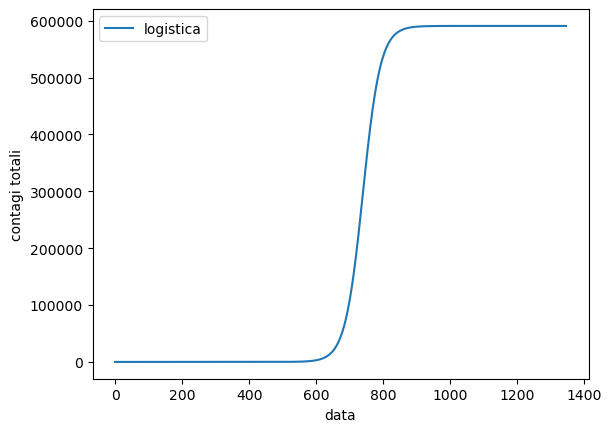

In [251]:
lo=logistica (sumtot, kl, t0l, t)
print(lo)
mpl.plot(lo, label='logistica')
mpl.xlabel("data")
mpl.ylabel("contagi totali")
mpl.legend()
mpl.show()

[     0.              0.              0.         ... 590823.97595359
 590823.97657073 590823.97717204]


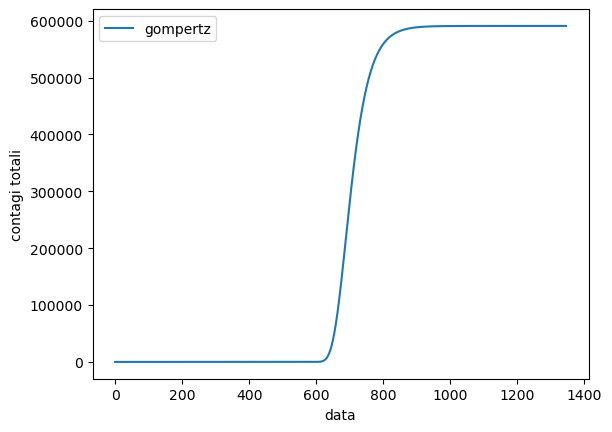

In [252]:
go=gompertz (sumtot, kg, t0g, t)
print(go)
mpl.plot(go, label='gompertz')
mpl.xlabel("data")
mpl.ylabel("contagi totali")
mpl.legend()
mpl.show()

Ora grafico le funzioni 'new_logistica e 'new_gompertz': quello che ci si aspetta di ottenere non è una funzione sempre crescente, infatti nel corso della pandemia il numero dei nuovi contagi giornalieri non deve per forza aumentare con passare delle giornate. In una prima fase si dovrebbe avere un aumento dei nuovi contagi gornalieri, e, una volta raggiunto il massimo, ci si attende che la funzione inizi a diminuire fino ad azzerarsi (la pandemia sarà finita quando la funzione risulta stabilmente nulla).

In [253]:
new_lo = np.zeros(1347)
new_go = np.zeros(1347)

[1.45767870e-08 1.51413640e-08 1.57278077e-08 ... 2.46369746e-06
 2.37184577e-06 2.28348654e-06]


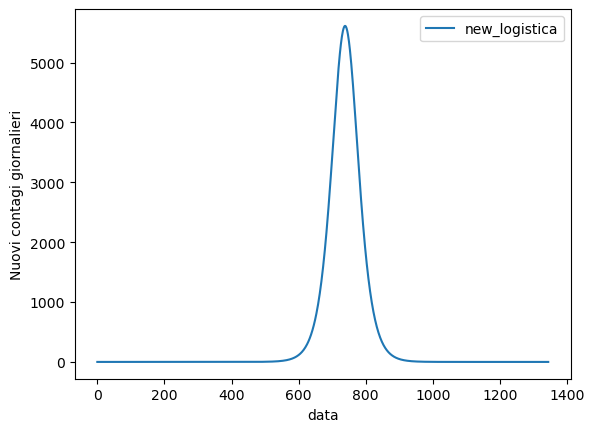

In [383]:
new_lo=new_logistica (sumtot, kl , t0l , t)
print(new_lo)  
mpl.plot(new_lo, label='new_logistica') 
mpl.xlabel("data")
mpl.ylabel("Nuovi contagi giornalieri")
mpl.legend()
mpl.show()

[0.         0.         0.         ... 0.00063341 0.00061715 0.00060131]


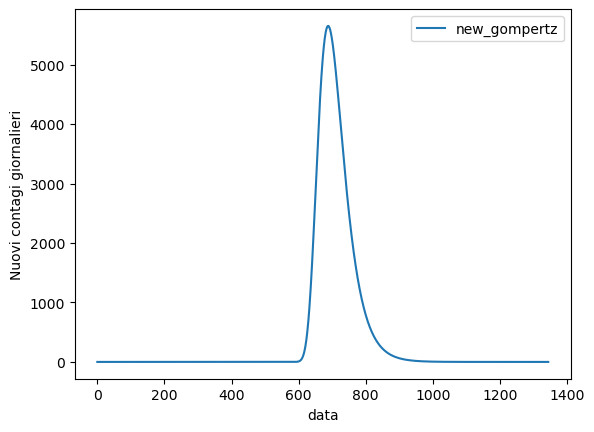

In [255]:
new_go=new_gompertz(sumtot, kg , t0g , t)
print(new_go)
mpl.plot(new_go, label='new_gompertz')
mpl.xlabel("data")
mpl.ylabel("Nuovi contagi giornalieri")
mpl.legend()
mpl.show()

A questo punto si è deciso di sovrapporre il grafico dei nuovi contagi giornalieri osservati con quelli predetti dalle funzioni new_logistica e new_gompertz, in modo da poter verificare come esse variano al variare dei parametri. Questo serve anche per avere un'idea del risultato che si ottiene nel caso si faccia una stima dei parametri su tutti i dati disponibili (1347 giorni).

In [384]:
#creo l'array nuovi_posiFVG che contiene i dati dei nuovi positivi facenti parte del dataframe iniziale
nuovi_posiFVG=dati1_FVG['nuovi_positivi'].to_numpy()     #ho trasformato la colonna 'nuovi_positivi' in un array
print(nuovi_posiFVG)


[  0   0   0 ...  41 133  80]


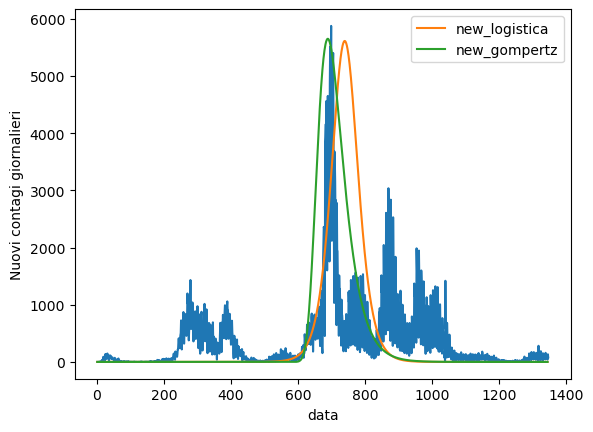

In [385]:
t=np.arange(1,1348,1)                 #ho dovuto ridefinire t per avere la stessa dimesione
mpl.plot(t, nuovi_posiFVG)            #questo perchè usando le funzioni 'new_logistica' o 'new_gompertz' perdo l'ultimo dato alla fine
t=np.arange(1,1346,1)
mpl.plot(t, new_lo, label='new_logistica' )
mpl.plot(t, new_go, label='new_gompertz' )
mpl.xlabel("data")
mpl.ylabel("Nuovi contagi giornalieri")
mpl.legend()
mpl.show()

Parte 3: Analisi della Prima Ondata
1. Concentrarsi sull'andamento dei contagi nella regione prestabilita durante i primi 35 giorni dalla comparsa dei primi casi (30 marzo 2020).
2. Supporre che i nuovi contagi giornalieri siano una realizzazione poissoniana con un valore di aspettazione dato dalla funzione logistica (e di Gompertz).
3. Scrivere una funzione per la likelihood poissoniana e utilizzarla per vincolare i valori dei parametri del modello.
4. Confrontare le previsioni del modello con i dati effettivi, propagando l'incertezza teorica associata al modello. Analizzare come la predizione fatta dopo i primi 35 giorni possa corrispondere all'andamento osservato nei primi 100 giorni (sia giornaliero sia cumulativo).
5. Commentare i risultati e i limiti dell’analisi

In [259]:
#dataset riguardante la sola regione FVG
n_righe=len(dati1_FVG)     #conto il numero di righe del dataframe
print(n_righe)
print(dati1_FVG)

1347
                     nuovi_positivi
data                               
2020-02-24 18:00:00               0
2020-02-25 18:00:00               0
2020-02-26 18:00:00               0
2020-02-27 18:00:00               0
2020-02-28 18:00:00               0
...                             ...
2023-10-28 17:00:00              71
2023-10-29 17:00:00              63
2023-10-30 17:00:00              41
2023-10-31 17:00:00             133
2023-11-01 17:00:00              80

[1347 rows x 1 columns]


I dati che vanno analizzati sono i nuovi positivi in FVG nei soli primi 35 giorni di pandemia: si crea un nuovo dataframe denominato 'primi_dati35' che comprenda solamente le prime 35 riche del dataframe 'dati1_FVG':

In [261]:
primi_dati35=dati1_FVG[:35]
print(primi_dati35)
n_righe_primi35=len(primi_dati35)     #conto il numero di righe del dataframe 'primi_dati35'
print(n_righe_primi35)

                     nuovi_positivi
data                               
2020-02-24 18:00:00               0
2020-02-25 18:00:00               0
2020-02-26 18:00:00               0
2020-02-27 18:00:00               0
2020-02-28 18:00:00               0
2020-02-29 17:00:00               0
2020-03-01 17:00:00               6
2020-03-02 18:00:00               3
2020-03-03 18:00:00               4
2020-03-04 17:00:00               5
2020-03-05 17:00:00               3
2020-03-06 17:00:00              10
2020-03-07 18:00:00              11
2020-03-08 18:00:00              15
2020-03-09 18:00:00              36
2020-03-10 18:00:00              23
2020-03-11 17:00:00              10
2020-03-12 17:00:00              41
2020-03-13 17:00:00              90
2020-03-14 17:00:00              44
2020-03-15 17:00:00              46
2020-03-16 17:00:00              39
2020-03-17 17:00:00               8
2020-03-18 17:00:00              68
2020-03-19 17:00:00             137
2020-03-20 17:00:00         

Una volta ottenuti i dati da analizzare, si è scelto innanziattuto di graficarli per vedere il loro andamento:

<Axes: xlabel='data'>

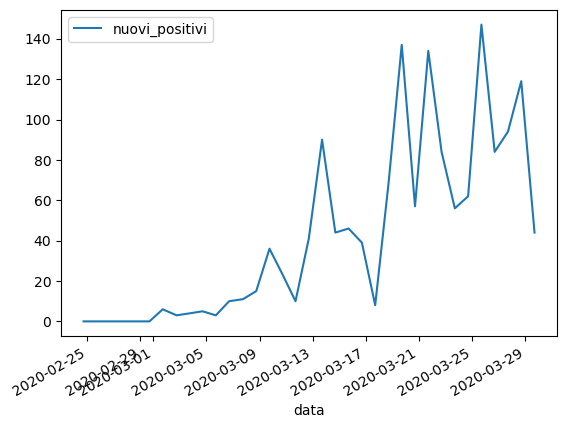

In [262]:
primi_dati35.plot()

Per ipotesi si suppone che i nuovi contagi giornalieri siano una realizzazione poissoniana con un valore di aspettazione dato dalla funzione logistica (e di Gompertz). Al fine di stimare i parametri del modello si scrive, quindi, la likelihood poissoniana, un prior ed un posterior come segue. I parametri del modello da stimare (per entrambe le funzioni) sono: N_tot che rappresenta  il totale dei contagi a fine ondata epidemica (del periodo analizzato); k che rappresenta la velocita’ di propagazione del contagio; ed infine t0, ovvero il giorno di contagio del paziente 0.

POISSONIANA : (e^(-lambdai))* (lambdai^ki) / (ki!)  

lambdai= valore medio di eventi nell'intervallo i-esimo di tempo--> esso corrisponde al valore di aspettazione questo caso, che è fornito dalla funzione logistica (e Gompertz) come richiesto.

ki= numero di successi nell'i-esimo intervallo di tempo

LIKELIHOOD POISSONIANA

È data dalla produttoria di n poissoniane--> prendendo il logaritmo, si ricorda che il logaritmo del prodotto è dato dalla somma dei logaritmi dell'argomento 



Inizialmente tratto il caso in cui i valori di aspettazione della Poissoniana sono dati dalla funzione 'new_logistica' e stimo i parametri ad essa associati:

In [263]:
#importo le librerie necessarie
from scipy.stats import poisson
from scipy.optimize import minimize
import emcee
import pygtc
from scipy.special import gamma

In [390]:
#fit con funzione new_logistica

t= np.arange(1,n_righe_primi35 + 1 ,1)

#logaritmo della likelihood Poissoniana
def log_likelihood(parametri, t, new_contagi_osservati):
    N_tot, k, t0 = parametri
    new_contagi_predetti= new_logistica(N_tot, k , t0, t)
    log_like = np.sum( (-new_contagi_predetti) +  (new_contagi_osservati)*(np.log(new_contagi_predetti)) - (np.log(gamma(new_contagi_osservati.astype(int) + 1))) )
    return log_like
#ho messo la funzione gamma per calcolare il fattoriale di un numero reale e ho aggiunto il +1 perchè la gamma(x+1) è uguale ad x fattoriale
#la funzione mt.factorial pende come argomento solo numeri interi


#log del prior
def log_prior(parametri):        #prior è 1 se N_tot è compreso tra 0 e 2500, k tra 0 e 5 e t0 tra 0 e 35--> il log_prior è 0
    N_tot, k, t0 = parametri             #prior è 0 se N_tot, k e t0 sono fuori dagli intervali sopra citati--> log_prior è -inf
    if  0<N_tot<2500 and 0<t0<35 and 0<k<5 :
        return 0
    return -np.inf



#log del posterior
def log_posterior(parametri, t , new_contagi_osservati):
    N_tot, k, t0 = parametri
    lp = log_prior(parametri)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(parametri, t , new_contagi_osservati)

    


In [347]:
#calcolo il numero totale di contagi nei primi 35 giorni
sum35 = primi_dati35["nuovi_positivi"].sum()     #faccio la somma su una colonna del dataframe
print("la somma dei nuovi contagi, ovvero i contagi totali nei primi 35 giorni: ")
print(sum35)

la somma dei nuovi contagi, ovvero i contagi totali nei primi 35 giorni: 
1480


In [338]:
New_osservati = primi_dati35['nuovi_positivi'].to_numpy()    #converto la colonna in un array
t= np.arange(1,n_righe_primi35 + 2 ,1)     #va da 1 a 36--> perderò l'ultimo dato quando calcolo la log_posterior 
                                           #perchè quando calcolo la log_likelihood uso implicitamente 'new_logistica'

X = t                              
Y = New_osservati
#print(X)
#print(Y)

np.random.seed(42)  #serve a rendere riproducibili i numeri casuali generati

#devo massimizzare la funzione 'log_posterior', che equivale a minimizzarla con segno opposto:
nll = lambda *args: -log_posterior(*args)

#definisco il valore inizale dei parametri da cui partire(3 parametri):
initial = np.array([1., 1., 1.])*(1+ 0.1 * np.random.randn(3))   

soln = minimize(nll, initial, args=(X,Y))

#ottengo i valori che minimizzano la funzione '-log_posterior'
LN_tot_bf, Lk_bf, Lt0_bf = soln.x    
print(soln.x)

[1.90509604e+03 2.08771903e-01 2.99593961e+01]


/Users/samuelebattistella/anaconda3/envs/JupyterNotebook_Test/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/samuelebattistella/anaconda3/envs/JupyterNotebook_Test/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/samuelebattistella/anaconda3/envs/JupyterNotebook_Test/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


100%|██████████████████████████████████████| 4000/4000 [00:05<00:00, 671.27it/s]


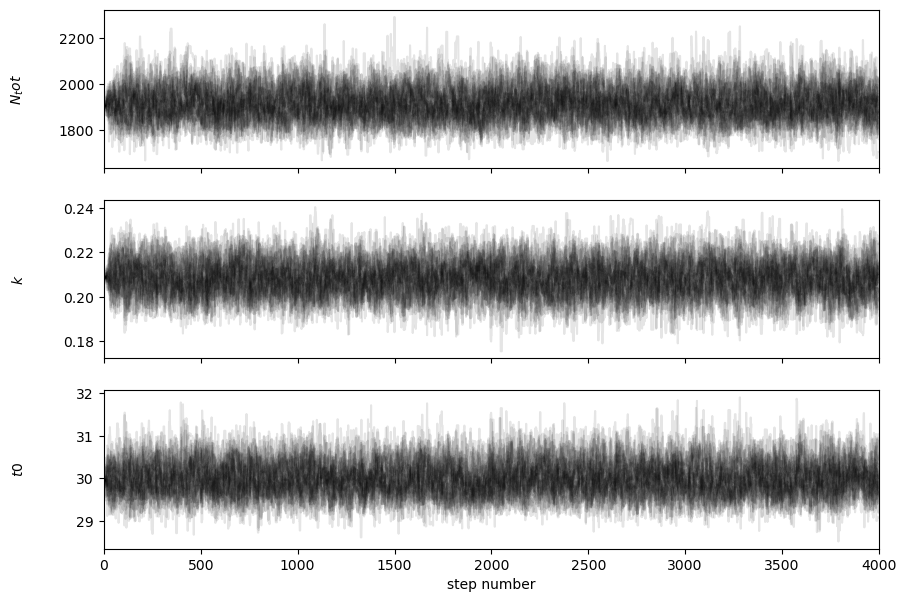

In [339]:
nparametri=3
nwalkers=32

#per campionare lo spazio dei parametri parto dal punto che minimizza la '-log_posterior' con una piccola fluttuazione casuale
pos = soln.x *(1+ 1e-4 * np.random.randn( nwalkers , nparametri ))
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_posterior, args=(X,Y)
)
sampler.run_mcmc(pos, 4000, progress=True);



fig, axes = mpl.subplots(3, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["$N_tot$","$k$", "$t0$"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.1)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");



In [349]:
#scarto i primi 300 passi della versione "piatta" dell'array delle catene ottenute durante il campionamento
flat_samples = sampler.get_chain(discard=300, flat=True)    
print(flat_samples.shape)                                  

(118400, 3)


Ora si crea un grafico a griglia che mostra le relazioni tra le coppie di parametri che si sono stimati con l'algoritmo EMCEE e le distribuzioni marginali dei singoli parametri:

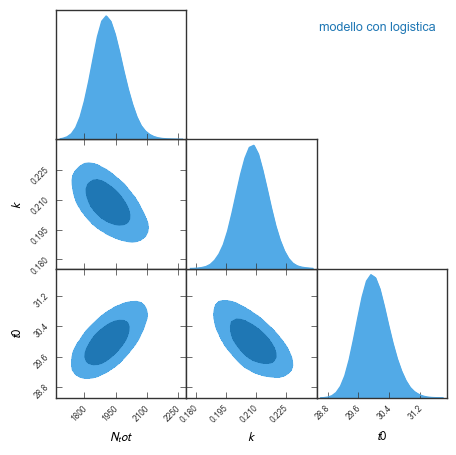

In [341]:
import pygtc
GTC = pygtc.plotGTC(chains=flat_samples,
                    paramNames=['$N_tot$','$k$','$t 0$'],
                    chainLabels=['modello con logistica'],
                    figureSize='MNRAS_page')

Osservando il grafico si può notare che i tre paramentri sono a due a due correlati tra loro: questo perchè le ellissi che si osservano sono inclinate. Se un'ellisse fosse stata orizzontale, allora non ci sarebbe stata correlazione tra quella particolare coppia di parametri. 
È importante notare che, se nella funzione log_prior limito maggiormente il valore di N_tot ad un valore più vicino al numero di contagiati totali nell'intervallo temporale analizzato, le ellisi risultano tagliate (perchè i walkers non possono muoversi liberamente su tutto lo spazio dei parametri) ma esse sembrano diventare orizzontali, quindi sembra che si perda (o per lo meno diminuisca) la correlazione tra le coppie di parametri. 

In [342]:
#Calcolo stima parametri e incertezze
Lstima_parametri = np.mean(samples, axis=(0, 1))     #faccio la media sugli assi 0 e 1--> faccio la media dei parametri ottenuti per ciascun walkers e poi la media dei risultati ottenuti per i diversi walkers
Lparametri_errori = np.percentile(samples, [16, 84], axis=(0, 1)) - Lstima_parametri  
Lsigma1_parametri = np.percentile(samples, 16, axis=(0, 1)) - Lstima_parametri 
Lsigma2_parametri = np.percentile(samples, 84, axis=(0, 1)) - Lstima_parametri 

print(Lstima_parametri)
print(Lparametri_errori)
print(Lsigma1_parametri)
print(Lsigma2_parametri)

#RISULTATI (per scriverli in modo compatto ho scelto solo la dev. std. riferita all'84° percentile)
print(" ")
print("la miglior stima dei parametri è: ")
print("N_tot= ", Lstima_parametri[0], "+- ", Lsigma2_parametri[0] )
print("k= ", Lstima_parametri[1], "+- ", Lsigma2_parametri[1] )
print("t0= ", Lstima_parametri[2], "+- ", Lsigma2_parametri[2] )

[1.91417020e+03 2.08360379e-01 2.99970426e+01]
[[-6.97554637e+01 -7.66052984e-03 -3.90426086e-01]
 [ 6.98925391e+01  7.62519810e-03  3.92753711e-01]]
[-6.97554637e+01 -7.66052984e-03 -3.90426086e-01]
[6.98925391e+01 7.62519810e-03 3.92753711e-01]
 
la miglior stima dei parametri è: 
N_tot=  1914.170203599798 +-  69.89253905266378
k=  0.20836037859861758 +-  0.00762519809924353
t0=  29.99704260914515 +-  0.3927537113101316


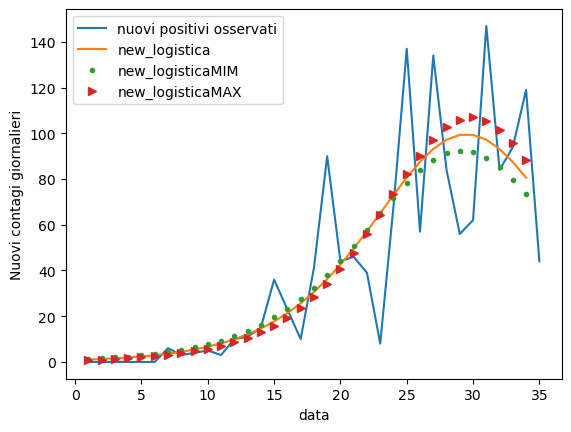

In [343]:
#faccio il grafico per vedere i risultati ottenuti

LN_tot=Lstima_parametri[0]
Lk=Lstima_parametri[1]
Lt0=Lstima_parametri[2]

#rendo la colonna nuovi_positivi del dataframe un array
nuovi_positivi = primi_dati35["nuovi_positivi"].to_numpy()
#uso l'array per fare il grafico
t=np.arange(1,36,1)
mpl.plot(t, nuovi_positivi , label='nuovi positivi osservati')


t=np.arange(1,36,1)
Logi=new_logistica(LN_tot, Lk, Lt0, t)
t=np.arange(1,35,1)
mpl.plot(t, Logi, label='new_logistica' )

#parametri con estremi inferiori (dev. std. riferita al 16° percentile)
LN_totMIN=Lstima_parametri[0]+ Lsigma1_parametri[0]
LkMIN=Lstima_parametri[1]+ Lsigma1_parametri[1]
Lt0MIN=Lstima_parametri[2]+  Lsigma1_parametri[2] 
t=np.arange(1,36,1)
Logi=new_logistica(LN_totMIN, LkMIN, Lt0MIN, t)
t=np.arange(1,35,1)
mpl.plot(t, Logi, '.', label='new_logisticaMIM')

#parametri con estremi superiori (dev. std. riferita al 84° percentile)
LN_totMAX=Lstima_parametri[0]+ Lsigma2_parametri[0]
LkMAX=Lstima_parametri[1]+ Lsigma2_parametri[1]
Lt0MAX=Lstima_parametri[2]+  Lsigma2_parametri[2] 
t=np.arange(1,36,1)
Logi=new_logistica(LN_totMAX, LkMAX, Lt0MAX, t)
t=np.arange(1,35,1)
mpl.plot(t, Logi, '>', label='new_logisticaMAX')
mpl.xlabel("data")
mpl.ylabel("Nuovi contagi giornalieri")
mpl.legend()
mpl.show()

Ora tratto il caso in cui i valori di aspettazione della distribuzione Poissoniana sono dati dalla funzione 'new_gompertz', quindi faccio lo stesso procedimento implementando le opportune modifiche per stimare i parametri ad essa associati:

In [357]:
t= np.arange(1,n_righe_primi35 + 1 ,1)

#logaritmo della likelihood Poissoniana
def log_likelihood(parametri, t, new_contagi_osservati):
    N_tot, k, t0 = parametri
    new_contagi_predetti= new_gompertz(N_tot, k , t0, t)
    log_like = np.sum( (-new_contagi_predetti) +  (new_contagi_osservati)*(np.log(new_contagi_predetti)) - (np.log(gamma(new_contagi_osservati.astype(int) + 1))) )
    return log_like
#ho messo la funzione gamma per calcolare il fattoriale di un numero reale e ho aggiunto il +1 perchè la gamma(x+1) è x fattoriale



#log del prior
def log_prior(parametri):         #prior è 1 se N_tot è compreso tra 0 e 4500, k tra 0 e 5 e t0 tra 0 e 35--> il log_prior è 0
    N_tot, k, t0 = parametri             #prior è 0 se N_tot, k e t0 sono fuori dagli intervali sopra citati--> log_prior è -inf
    if  0<N_tot<4500 and 0<t0<35 and 0<k<5 :
        return 0
    return -np.inf



#log del posterior
def log_posterior(parametri, t , new_contagi_osservati):
    N_tot, k, t0 = parametri
    lp = log_prior(parametri)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(parametri, t , new_contagi_osservati)

    


In [358]:
#calcolo il numero totale di contagi nei primi 35 giorni
sum35 = primi_dati35["nuovi_positivi"].sum()   #faccio la somma su una colonna del dataframe
print("la somma dei nuovi contagi, ovvero i contagi totali nei primi 35 giorni: ")
print(sum35)

la somma dei nuovi contagi, ovvero i contagi totali nei primi 35 giorni: 
1480


In [386]:
New_osservati = primi_dati35['nuovi_positivi'].to_numpy()    #converto la colonna in un array
t= np.arange(1,n_righe_primi35 + 2 ,1)           #va da 1 a 36--> perderò l'ultimo dato quando calcolo la log_posterior 
                                                 #perchè quando calcolo la log_likelihood uso implicitamente 'new_gompertz'


X = t                              
Y = New_osservati                
#print(X)
#print(Y)

np.random.seed(42)     #serve a rendere riproducibili i numeri casuali generati

#devo massimizzare la funzione 'log_posterior', che equivale a minimizzarla con segno opposto:
nll = lambda *args: -log_posterior(*args)

#definisco il valore inizale dei parametri da cui partire(3 parametri):
initial = np.array([1., 1., 1.])*(1+ 0.1 * np.random.randn(3))   

soln = minimize(nll, initial, args=(X,Y))

#ottengo i valori che minimizzano la funzione '-log_posterior'
GN_tot_bf, Gk_bf, Gt0_bf = soln.x    
print(soln.x)

[1.93012676e+02 7.82855400e-02 1.61913635e-01]


/Users/samuelebattistella/anaconda3/envs/JupyterNotebook_Test/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/var/folders/rx/fd718pbx6m5_kpff7jd4qnk00000gn/T/ipykernel_980/2184960159.py:7: RuntimeWarning: divide by zero encountered in log
  log_like = np.sum( (-new_contagi_predetti) +  (new_contagi_osservati)*(np.log(new_contagi_predetti)) - (np.log(gamma(new_contagi_osservati.astype(int) + 1))) )
/Users/samuelebattistella/anaconda3/envs/JupyterNotebook_Test/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/samuelebattistella/anaconda3/envs/JupyterNotebook_Test/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/samuelebattistella/anaconda3/envs/JupyterNotebook_Test/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:57

100%|██████████████████████████████████████| 4000/4000 [00:05<00:00, 688.84it/s]


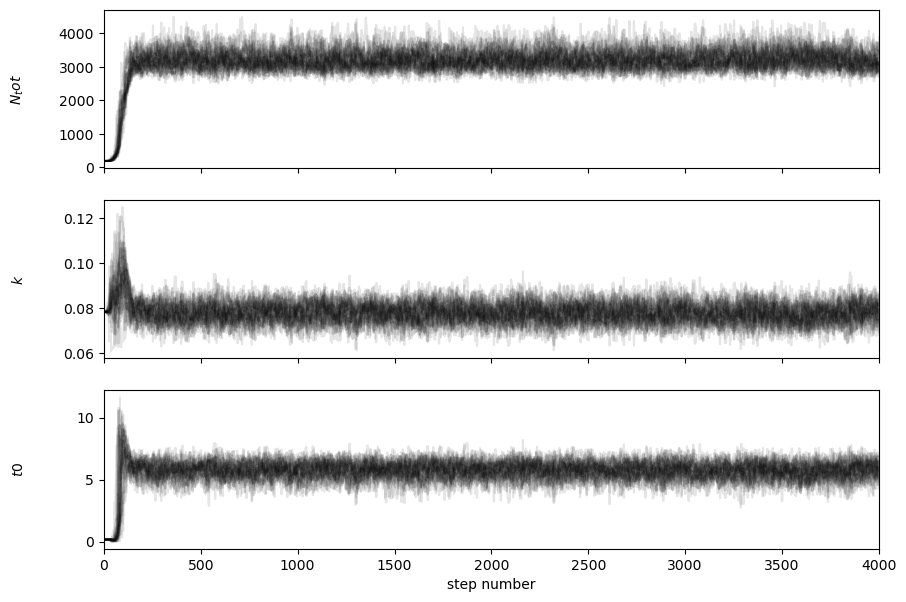

In [360]:
nparametri=3
nwalkers=32

#per campionare lo spazio dei parametri parto dal punto che minimizza la '-log_posterior' con una piccola fluttuazione casuale
pos = soln.x *(1+ 1e-4 * np.random.randn( nwalkers , nparametri ))
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(
    nwalkers, ndim, log_posterior, args=(X,Y)
)
sampler.run_mcmc(pos, 4000, progress=True);



fig, axes = mpl.subplots(3, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["$N_tot$","$k$", "$t0$"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.1)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");



In [361]:
#scarto i primi 300 passi della versione "piatta" dell'array delle catene ottenute durante il campionamento
flat_samples = sampler.get_chain(discard=300, flat=True)        
print(flat_samples.shape)

(118400, 3)


Analogamente al caso precedente si crea un grafico a griglia che mostra le relazioni tra le coppie di parametri che si sono stimati con l'algoritmo EMCEE e le distribuzioni marginali dei singoli parametri:

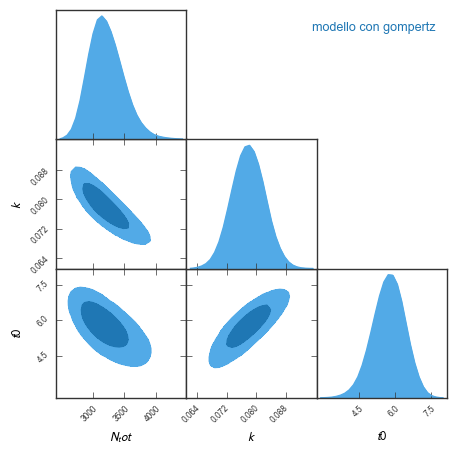

In [362]:
import pygtc
GTC = pygtc.plotGTC(chains=flat_samples,
                    paramNames=['$N_tot$','$k$','$t 0$'],
                    chainLabels=['modello con gompertz'],
                    figureSize='MNRAS_page')

Il grafico ottenuto è simile al caso precedente: si possono notare le correlazioni tra le coppie di parametri stimati notando che le ellissi non sono disposte orizzontalmente bensì sono oblique.
Anche in questo caso, se limito maggiormente i walkers nello spazio dei parametri agendo sul limite superiore del log_prior per quanto riguarda N_tot, ottengo delle ellissi tagliate ma apparentemente più orizzontali (diminuisce la correlazione).

In [363]:
# Calcolo stima parametri e incertezze
Gstima_parametri = np.mean(samples, axis=(0, 1))     #faccio la media sugli assi 0 e 1--> faccio la media dei parametri ottenuti per ciascun walkers e poi la media dei risultati ottenuti per i diversi walkers
Gparametri_errori = np.percentile(samples, [16, 84], axis=(0, 1)) - Gstima_parametri  
Gsigma1_parametri = np.percentile(samples, 16, axis=(0, 1)) - Gstima_parametri 
Gsigma2_parametri = np.percentile(samples, 84, axis=(0, 1)) - Gstima_parametri 

print(Gstima_parametri)
print(Gparametri_errori)
print(Gsigma1_parametri)
print(Gsigma2_parametri)

#RISULTATI (per scriverli in modo compatto ho scelto solo la dev. std. riferita all'84° percentile)
print(" ")
print("la miglior stima dei parametri è: ")
print("N_tot= ", Gstima_parametri[0], "+- ", Gsigma2_parametri[0] )
print("k= ", Gstima_parametri[1], "+- ", Gsigma2_parametri[1] )
print("t0= ", Gstima_parametri[2], "+- ", Gsigma2_parametri[2] )

[3.14045784e+03 7.81376926e-02 5.64599128e+00]
[[-2.11402616e+02 -4.53395946e-03 -6.01840318e-01]
 [ 3.25143451e+02  4.27795431e-03  7.50286265e-01]]
[-2.11402616e+02 -4.53395946e-03 -6.01840318e-01]
[3.25143451e+02 4.27795431e-03 7.50286265e-01]
 
la miglior stima dei parametri è: 
N_tot=  3140.4578365879506 +-  325.14345108138104
k=  0.07813769257796196 +-  0.004277954309212559
t0=  5.6459912783116355 +-  0.7502862652329068


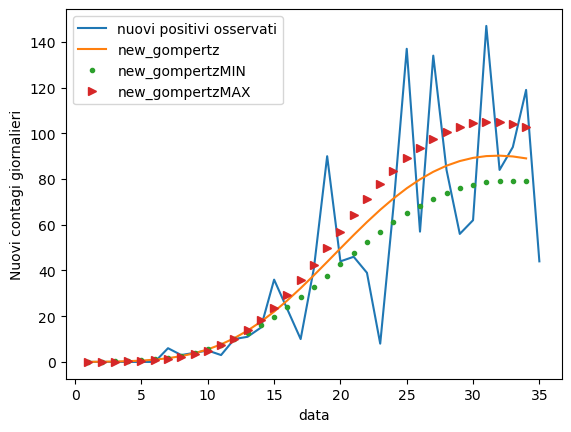

In [329]:
#faccio il grafico per vedere i risultati ottenuti

GN_tot=Gstima_parametri[0]
Gk=Gstima_parametri[1]
Gt0=Gstima_parametri[2]

#rendo la colonna nuovi_positivi del dataframe un array
nuovi_positivi = primi_dati35["nuovi_positivi"].to_numpy()
#uso l'array per fare il grafico
t=np.arange(1,36,1)
mpl.plot(t, nuovi_positivi, label='nuovi positivi osservati' )


#grafico la curva dei contagi ottenuta come risultato del fit
t=np.arange(1,36,1)
Gomp=new_gompertz(GN_tot, Gk, Gt0, t)
t=np.arange(1,35,1)
mpl.plot(t, Gomp, label='new_gompertz' )


#parametri con estremi inferiori
GN_totMIN=Gstima_parametri[0]+ Gsigma1_parametri[0]
GkMIN=Gstima_parametri[1]+ Gsigma1_parametri[1]
Gt0MIN=Gstima_parametri[2]+  Gsigma1_parametri[2] 
t=np.arange(1,36,1)
Gomp=new_gompertz(GN_totMIN, GkMIN, Gt0MIN, t)
t=np.arange(1,35,1)
mpl.plot(t, Gomp, '.', label='new_gompertzMIN')

#parametri con estremi superiori
GN_totMAX=Gstima_parametri[0]+ Gsigma2_parametri[0]
GkMAX=Gstima_parametri[1]+ Gsigma2_parametri[1]
Gt0MAX=Gstima_parametri[2]+  Gsigma2_parametri[2] 
t=np.arange(1,36,1)
Gomp=new_gompertz(GN_totMAX, GkMAX, Gt0MAX, t)
t=np.arange(1,35,1)
mpl.plot(t, Gomp, '>', label='new_gompertzMAX')
mpl.xlabel("data")
mpl.ylabel("Nuovi contagi giornalieri")
mpl.legend()
mpl.show()

Ora faccio un grafico unico riguardante tutti i risultati ottenuti in seguito all'analisi dei primi 35 giorni:

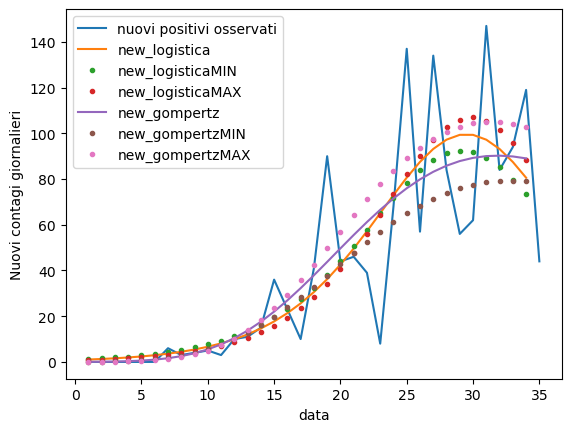

In [364]:
#dati osservati
nuovi_positivi = primi_dati35["nuovi_positivi"].to_numpy()
t=np.arange(1,36,1)
mpl.plot(t, nuovi_positivi, label='nuovi positivi osservati' )

#risultati con Logistica

t=np.arange(1,36,1)
Logi=new_logistica(LN_tot, Lk, Lt0, t)
t=np.arange(1,35,1)
mpl.plot(t, Logi, label='new_logistica' )
#parametri con estremi inferiori
LN_totMIN=Lstima_parametri[0]+ Lsigma1_parametri[0]
LkMIN=Lstima_parametri[1]+ Lsigma1_parametri[1]
Lt0MIN=Lstima_parametri[2]+  Lsigma1_parametri[2] 
t=np.arange(1,36,1)
Logi=new_logistica(LN_totMIN, LkMIN, Lt0MIN, t)
t=np.arange(1,35,1)
mpl.plot(t, Logi, '.', label='new_logisticaMIN')
#parametri con estremi superiori
LN_totMAX=Lstima_parametri[0]+ Lsigma2_parametri[0]
LkMAX=Lstima_parametri[1]+ Lsigma2_parametri[1]
Lt0MAX=Lstima_parametri[2]+  Lsigma2_parametri[2] 
t=np.arange(1,36,1)
Logi=new_logistica(LN_totMAX, LkMAX, Lt0MAX, t)
t=np.arange(1,35,1)
mpl.plot(t, Logi, '.', label='new_logisticaMAX')


#risultati con Gompertz

#grafico la curva dei contagi ottenuta come risultato del fit
t=np.arange(1,36,1)
Gomp=new_gompertz(GN_tot, Gk, Gt0, t)
t=np.arange(1,35,1)
mpl.plot(t, Gomp, label='new_gompertz')
#parametri con estremi inferiori
GN_totMIN=Gstima_parametri[0]+ Gsigma1_parametri[0]
GkMIN=Gstima_parametri[1]+ Gsigma1_parametri[1]
Gt0MIN=Gstima_parametri[2]+  Gsigma1_parametri[2] 
t=np.arange(1,36,1)
Gomp=new_gompertz(GN_totMIN, GkMIN, Gt0MIN, t)
t=np.arange(1,35,1)
mpl.plot(t, Gomp, '.', label='new_gompertzMIN')
#parametri con estremi superiori
GN_totMAX=Gstima_parametri[0]+ Gsigma2_parametri[0]
GkMAX=Gstima_parametri[1]+ Gsigma2_parametri[1]
Gt0MAX=Gstima_parametri[2]+  Gsigma2_parametri[2] 
t=np.arange(1,36,1)
Gomp=new_gompertz(GN_totMAX, GkMAX, Gt0MAX, t)
t=np.arange(1,35,1)
mpl.plot(t, Gomp, '.', label='new_gompertzMAX')
mpl.xlabel("data")
mpl.ylabel("Nuovi contagi giornalieri")
mpl.legend()
mpl.show()

In questo grafico sono racchiusi i dati osservati riguardanti i nuovi contagi nel FVG nei primi 35 giorni; il  best_fit con la funzione new_logistica e quello con la funzione new_gompertz. Inoltre sono state tracciate le curve della new_logistica e new_gompertz utilizzando il valore minimo dei parametri (best_fit - devizione standard) e il valore massimo dei parametri (best_fit + deviazione standard). La devizione standard è stata calcolata considerando il 16° e l'84° percentile della funzione di distribuzione Poissoniana (infatti a t=fissato, per ipotesi, i nuovi contagi seguono una funzione di distribuzione Poissoniana con valore di aspettazione quello ottenuto calcolando la new_logistica oppure la new_gompertz nell'instante di tempo considerato).

Ora voglio analizzare come la predizione fatta dopo i primi 35 giorni possa corrispondere all'andamento osservato nei primi 100 giorni (sia giornaliero sia cumulativo).

Nel caso di andamento giornaliero si ottiene:

In [284]:
#estrapolo solamente i valori dei nuovi_positivi nei primi 100 giorni in FVG, e ne faccio il grafico
primi_dati100=dati1_FVG[:100]

print(primi_dati100)
n_righe_primi100=len(primi_dati100)     #conto il numero di righe del dataframe tagliato
print(n_righe_primi100)

                     nuovi_positivi
data                               
2020-02-24 18:00:00               0
2020-02-25 18:00:00               0
2020-02-26 18:00:00               0
2020-02-27 18:00:00               0
2020-02-28 18:00:00               0
...                             ...
2020-05-29 17:00:00               5
2020-05-30 17:00:00               4
2020-05-31 17:00:00               2
2020-06-01 17:00:00               1
2020-06-02 17:00:00               2

[100 rows x 1 columns]
100


<Axes: xlabel='data'>

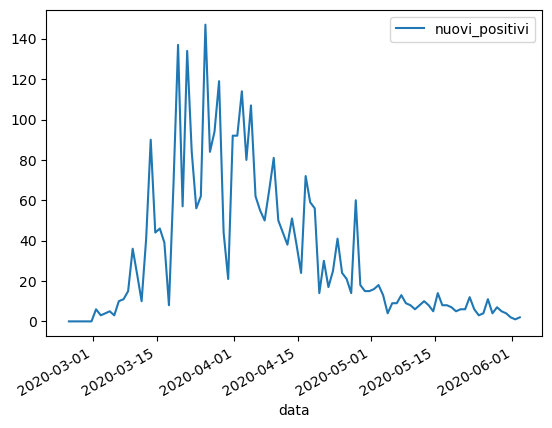

In [285]:
primi_dati100.plot()

Ora, a questo grafico, sovrappongo le curve delle funzioni new_logistica e new_gompertz ottenute mediante la stima dei parametri fatta sopra, quindi analizzando solamente i dati dei primi 35 giorni di pandemia (ovviamente della sola regione FVG):

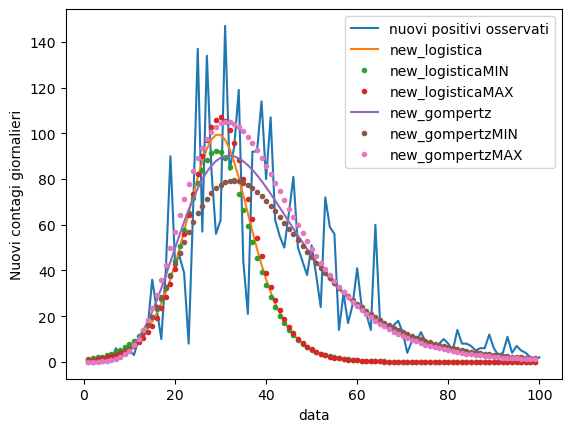

In [388]:
#creo un vettore a partire dalla colonna del Dataframe primi_dati100
nuovi_positivi = primi_dati100["nuovi_positivi"].to_numpy()
#grafico i dati osservati
t=np.arange(1,101,1)
mpl.plot(t, nuovi_positivi, label='nuovi positivi osservati' )


#risultati con Logistica

t=np.arange(1,101,1)
Logi=new_logistica(LN_tot, Lk, Lt0, t)
t=np.arange(1,100,1)
mpl.plot(t, Logi, label='new_logistica')
#parametri con estremi inferiori
LN_totMIN=Lstima_parametri[0]+ Lsigma1_parametri[0]
LkMIN=Lstima_parametri[1]+ Lsigma1_parametri[1]
Lt0MIN=Lstima_parametri[2]+  Lsigma1_parametri[2] 
t=np.arange(1,101,1)
Logi=new_logistica(LN_totMIN, LkMIN, Lt0MIN, t)
t=np.arange(1,100,1)
mpl.plot(t, Logi, '.', label='new_logisticaMIN')
#parametri con estremi superiori
LN_totMAX=Lstima_parametri[0]+ Lsigma2_parametri[0]
LkMAX=Lstima_parametri[1]+ Lsigma2_parametri[1]
Lt0MAX=Lstima_parametri[2]+  Lsigma2_parametri[2] 
t=np.arange(1,101,1)
Logi=new_logistica(LN_totMAX, LkMAX, Lt0MAX, t)
t=np.arange(1,100,1)
mpl.plot(t, Logi, '.', label='new_logisticaMAX')



#risultati con Gompertz

#grafico la curva dei contagi ottenuta come risultato del fit
t=np.arange(1,101,1)
Gomp=new_gompertz(GN_tot, Gk, Gt0, t)
t=np.arange(1,100,1)
mpl.plot(t, Gomp, label='new_gompertz' )
#parametri con estremi inferiori
GN_totMIN=Gstima_parametri[0]+ Gsigma1_parametri[0]
GkMIN=Gstima_parametri[1]+ Gsigma1_parametri[1]
Gt0MIN=Gstima_parametri[2]+  Gsigma1_parametri[2] 
t=np.arange(1,101,1)
Gomp=new_gompertz(GN_totMIN, GkMIN, Gt0MIN, t)
t=np.arange(1,100,1)
mpl.plot(t, Gomp, '.', label='new_gompertzMIN')
#parametri con estremi superiori
GN_totMAX=Gstima_parametri[0]+ Gsigma2_parametri[0]
GkMAX=Gstima_parametri[1]+ Gsigma2_parametri[1]
Gt0MAX=Gstima_parametri[2]+  Gsigma2_parametri[2] 
t=np.arange(1,101,1)
Gomp=new_gompertz(GN_totMAX, GkMAX, Gt0MAX, t)
t=np.arange(1,100,1)
mpl.plot(t, Gomp, '.', label='new_gompertzMAX')
mpl.xlabel("data")
mpl.ylabel("Nuovi contagi giornalieri")
mpl.legend()
mpl.show()

Osservando questo grafico, quello che si può dedurre è che: mentre la curva della funzione new_logistica descrive bene il fit nei primi 35 giorni ed essa è preferibile alla funzione new_gompertz in questo intervallo temporale (almeno visivamente confrontando i due grafici); quello che accade in un intervallo temporale più ampio è proprio l'opposto: in questo caso la curva che approssima meglio l'andamento dei nuovi positivi è quella di Gompertz. Questo fatto emerge sopratutto nella seconda metà dell'intervallo temporale considerato, dove la curva Logistica decresce molto velocemente e si discosta dall'andamento osservato nella realtà. Molto meglio, invece, la decrescita della curva di Gompertz che segue quasi l'andamento dei dati. Per ottenere un risultato ancora migliore si potrebbe fare una nuova stima dei paramentri considerando tutti i dati dei primi 100 giorni. In ogni caso, però, è evidente che con solo i dati dei primi 35 giorni e la funzione new_gompertz si riesce a descrivere in modo soddisfacente l'andamento della pandemia per l'intervallo temporale qui considerato (primi 100 giorni).

Nel caso di un andamento cumulativo: 
si considera, giorno per giorno, il totale di persone contagiate (nuovi contagi giornalieri sommati al totale dei contagi precedenti). Anche in questo caso si prende in consideranzione il risultato della stima dei parametri in seguito all'analisi dei primi 35 giorni; e fissando i parametri ottenuti, si prova a vedere se essi descrivono bene l'andamento dei contagi totali fino al 100° giorno.
È importante notare che, le funzioni new_logistica e new_gompertz, per come sono state definite, sono descritte esattamente dagli stessi parametri delle funzioni logistica e gompertz: ragion per cui si sfrutta il lavoro fatto in precedenza e si è deciso di non effettuare nuovamente la stima dei parametri. 

In [367]:
#dati osservati
#trasformo la colonna del database in un array
nuovi_positivi = primi_dati35["nuovi_positivi"].to_numpy()

#calcolo i contagi totali giorno per giorno-->sommando a ciascuna componete di nuovi_contagi tutte le componenti precedenti
contagi_35 = np.cumsum(nuovi_positivi)                         # in modo da ottenere un vettore con valori sempre crescenti
print(contagi_35)                

[   0    0    0    0    0    0    6    9   13   18   21   31   42   57
   93  116  126  167  257  301  347  386  394  462  599  656  790  874
  930  992 1139 1223 1317 1436 1480]


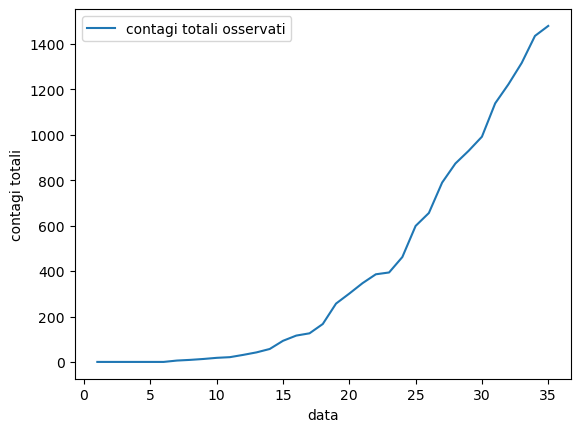

In [368]:
#grafico i contagi totali nei primi 35 giorni
t=np.arange(1,36,1)
mpl.plot(t, contagi_35, label='contagi totali osservati')
mpl.xlabel("data")
mpl.ylabel("contagi totali")
mpl.legend()
mpl.show()

Questo è il grafico dei contagi totali (andamento cumulativo) per i primi 35 giorni. 

Ora, sfruttando i parametri ottenuti in precedenza (analizzando i primi 35 giorni), si vuole verificare se le funzioni logistica e gompertz sono in grado di descrivere bene l'andamento dei contagi totali nei primi 100 giorni.
Per farlo, si graficano i contagi totali nell'arco temporale considerato e le curve che rappresentano le funzioni logistica e gompertz.

 NOTA: non si utilizzano le funzioni new_logistica e new_gompertz perchè esse sono state definite per descrivere l'andamento dei nuovi contagi. In questo caso si utilizzano proprio le funzione sopra definite come logistca e gompertz (si sta trattando i contagi totali).

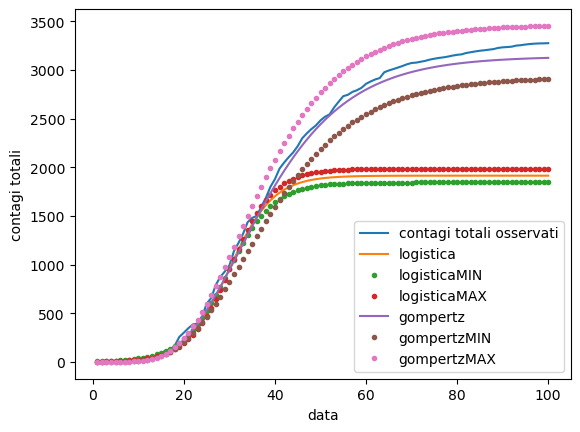

In [370]:
#grafico contagi totali primi 100 giorni

#dati osservati
nuovi_positivi = primi_dati100["nuovi_positivi"].to_numpy()    #trasformo la colonna in un array
contagi_100= np.cumsum(nuovi_positivi)                         #calcolo i contagi totali con np.cumsum()
t=np.arange(1,101,1)
mpl.plot(t, contagi_100, label='contagi totali osservati' )


#risultati con Logistica
#grafico la curva dei contagi ottenuta come risultato del fit
t=np.arange(1,101,1)
Logi=logistica(LN_tot, Lk, Lt0, t)
mpl.plot(t, Logi, label='logistica' )
#parametri con estremi inferiori
LN_totMIN=Lstima_parametri[0]+ Lsigma1_parametri[0]
LkMIN=Lstima_parametri[1]+ Lsigma1_parametri[1]
Lt0MIN=Lstima_parametri[2]+  Lsigma1_parametri[2] 
t=np.arange(1,101,1)
Logi=logistica(LN_totMIN, LkMIN, Lt0MIN, t)
mpl.plot(t, Logi, '.', label='logisticaMIN')
#parametri con estremi superiori
LN_totMAX=Lstima_parametri[0]+ Lsigma2_parametri[0]
LkMAX=Lstima_parametri[1]+ Lsigma2_parametri[1]
Lt0MAX=Lstima_parametri[2]+  Lsigma2_parametri[2] 
t=np.arange(1,101,1)
Logi=logistica(LN_totMAX,LkMAX ,Lt0MAX , t)
mpl.plot(t, Logi, '.', label='logisticaMAX')



#risultati con Gompertz
#grafico la curva dei contagi ottenuta come risultato del fit
t=np.arange(1,101,1)
Gomp=gompertz(GN_tot, Gk, Gt0, t)
mpl.plot(t, Gomp, label='gompertz' )
#parametri con estremi inferiori
GN_totMIN=Gstima_parametri[0]+ Gsigma1_parametri[0]
GkMIN=Gstima_parametri[1]+ Gsigma1_parametri[1]
Gt0MIN=Gstima_parametri[2]+  Gsigma1_parametri[2] 
t=np.arange(1,101,1)
Gomp=gompertz(GN_totMIN, GkMIN, Gt0MIN, t)
mpl.plot(t, Gomp, '.', label='gompertzMIN')
#parametri con estremi superiori
GN_totMAX=Gstima_parametri[0]+ Gsigma2_parametri[0]
GkMAX=Gstima_parametri[1]+ Gsigma2_parametri[1]
Gt0MAX=Gstima_parametri[2]+  Gsigma2_parametri[2] 
t=np.arange(1,101,1)
Gomp=gompertz(GN_totMAX, GkMAX, Gt0MAX, t)
mpl.plot(t, Gomp, '.', label='gompertzMAX')
mpl.xlabel("data")
mpl.ylabel("contagi totali")
mpl.legend()
mpl.show()

Come si può osservare da questo grafico, i contagi totali sono ben descritti, nella parte inziale, da entrambe le funzioni (logistica e gompertz). Man mano che i giorni aumentano, però, la funzione logistica si discosta sempre più da quella che è la curva osservata; mentre la funzione gompertz sembra continuare a descrivere sufficientemente bene l'andamento. Questo deriva dal fatto che la funzione gompertz descrive meglio la seconda parte delle ondate epidemiche, e perchè nella funzione log_prior si è deciso di scegliere dei vincoli non troppo restrittivi per la stima dei paramentri (soprattutto per N_tot). Si è scelto, infatti, un prior che consentisse ai walkers di campionare meglio lo spazio dei parametri, e questa scelta ha ripagato quando, come in questo caso, c'è stata la necessità di dover analizzare un intervallo temporale più ampio, senza necessariamente rifare la stima dei parametri con l'algoritmo EMCEE.

Parte 4: Modellizzazione dell'Intervallo 3 Giugno 2020 - 3 Giugno 2021
1. Considerare l'intervallo temporale tra il 3 giugno 2020 e il 3 giugno 2021.
2. Alla luce di quanto verificato precedentemente, come modellereste l’andamento epidemiologico in questo periodo?

Come prima cosa si è deciso di graficare i nuovi contagiati facenti parte dell'intervallo temporale richiesto. Questo è stato fatto analogamente ai punti precendeti, ovvero selezionando solamente i dati necessari dal dataframe inziale:

                     nuovi_positivi
data                               
2020-06-03 17:00:00               0
2020-06-04 17:00:00               3
2020-06-05 17:00:00               1
2020-06-06 17:00:00               3
2020-06-07 17:00:00               0
...                             ...
2021-05-30 17:00:00              34
2021-05-31 17:00:00               8
2021-06-01 17:00:00              19
2021-06-02 17:00:00              35
2021-06-03 17:00:00               6

[366 rows x 1 columns]
366


<Axes: xlabel='data'>

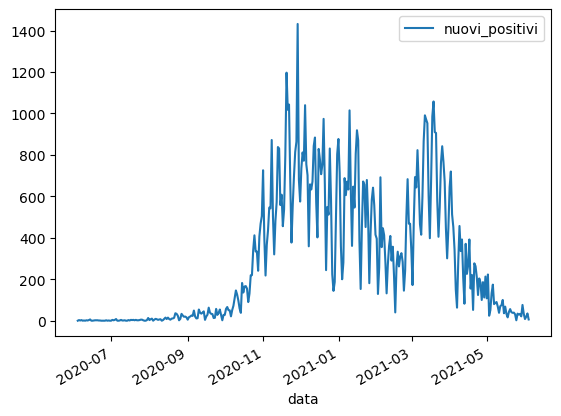

In [391]:
#estrapolo solamente i valori dei nuovi_positivi nei giorni  richiesti, e ne faccio il grafico
#creo il dataframe 'dati_intervallo' a partire dal dataframe 'dati1_FVG'
dati_intervallo=dati1_FVG[100:466]

print(dati_intervallo)
n_righe_dati=len(dati_intervallo)     #conto il numero di righe del dataframe tagliato
print(n_righe_dati)

#faccio il grafico
dati_intervallo.plot()

Osservando il grafico è evidente che l'andamento principale (quindi senza considerare le piccole oscillazioni) presenta due picchi: i nuovi contagi sono inizialmente aumentati (fintanto che hanno raggiunto un picco massimo) per poi tornare a diminuire ed infine ripetere l'andamento. Si possono notare, quindi, due ondate di nuovi contagi, ciascuna rappresentata da un picco principale. 
Se, per descrivere questo grafico, si utilizzasse una sola funzione 'new_logistica' oppure una sola funzione 'new_gompertz' (già definite in precedenza), ci si aspetta un pessimo risultato. Questo perchè, utilizzando l'algoritmo EMCEE è possibile trovare i migliori valori possibili dei parametri che caratterizzano queste funzioni, ma esse non hanno un andamento adattabile alla curva che devono descrivere. In particolare, entrambe le funzioni sono caratterizzate da un'unico picco mentre, come già detto, il grafico ne ha due e ben distinti.

Per provare a risolvere questo problema si potrebbe utilizzare una somma di due funzioni 'new_logistica' oppure due funzioni 'new_gompertz' dove ciascuna serve a descrivere un picco: è importante notare che, se si decide di scegliere questa procedura, i parametri totali che si andranno a stimare non saranno più 3, bensì saranno 6 (3 parametri per ogni funzione). 

Quando si calcola il minimo della -log_posterior e poi si utilizza l'algoritmo EMCEE, bisogna definire il punto di partenza nello spazio dei parametri. Questo è molto importante e consente una giusta analisi:  scegliere un punto di partenza accurato consente di non finire in minimi locali ma di cercare il minimo globale. Per ottenere il punto di partenza adeguato (per ciascun parametro) è bene semplificare il problema. Per farlo si potrebbe dividere il set di dati in due sottoinsiemi (in modo che il primo contenga il primo picco mentre il secondo contenga il secondo picco) e ottenere la stima dei 6 paramentri delle funzioni in modo separato (2 gruppi da 3 parmentri). La stima ottenuta può essere utilizzata come punto di partenza per effettuare un'analisi completa su tutti i paramentri contemporanemante. 

Ottengo quindi i due sottoinsiemi dei dati:

la somma dei nuovi contagi, ovvero i contagi totali nei giorni esaminati è: 
71048


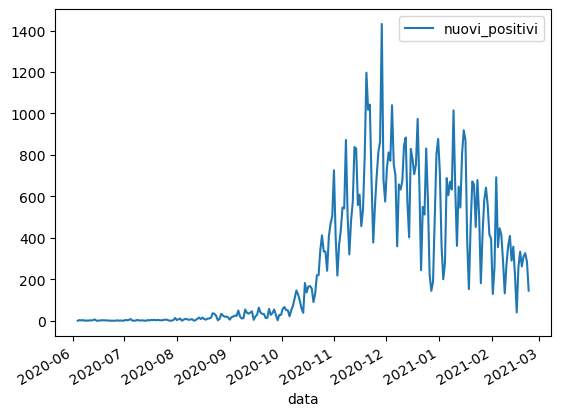

In [292]:
#dati realtivi al primo picco
dati_intervallo1=dati1_FVG[100:365]
dati_intervallo1.plot()
tot_contagi1=dati_intervallo1['nuovi_positivi'].sum()    #somma lungo la colonna del dataframe
print("la somma dei nuovi contagi, ovvero i contagi totali nei giorni esaminati è: ")
print(tot_contagi1)

la somma dei nuovi contagi, ovvero i contagi totali nei giorni esaminati è: 
32958


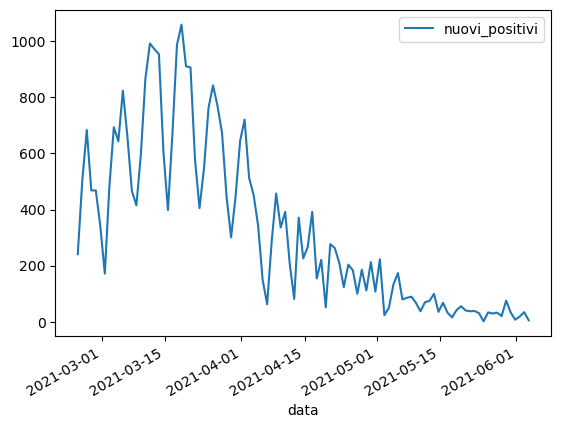

In [293]:
#dati realtivi al secondo picco
dati_intervallo2=dati1_FVG[365:466]
dati_intervallo2.plot()
tot_contagi2=dati_intervallo2['nuovi_positivi'].sum()    #somma lungo la colonna del dataframe
print("la somma dei nuovi contagi, ovvero i contagi totali nei giorni esaminati è: ")
print(tot_contagi2)

Una volta ottenuta la convergenza del fit su queste due curve separatamente, si considera l'insieme completo dei dati da analizzare. Come prima cosa si definiscono le funzioni 'somma_logistica' e 'somma_gompertz' e le si graficano (in questo caso i parametri sono stati scelti in modo quasi arbitrario, solo a titolo di esempio):

In [294]:
#somma di due logistica

def somma_logistica(N_tot1L ,k1L, t01L, N_tot2L ,k2L, t02L, t):
    logi1=logistica(N_tot1L ,k1L, t01L, t)
    logi2=logistica(N_tot2L ,k2L, t02L, t)
    somma_logi= logi1 + logi2
    return somma_logi

In [295]:
N_tot1L= tot_contagi1
k1L= 0.02
t01L=210
N_tot2L=tot_contagi2
k2L=0.01
t02L=370

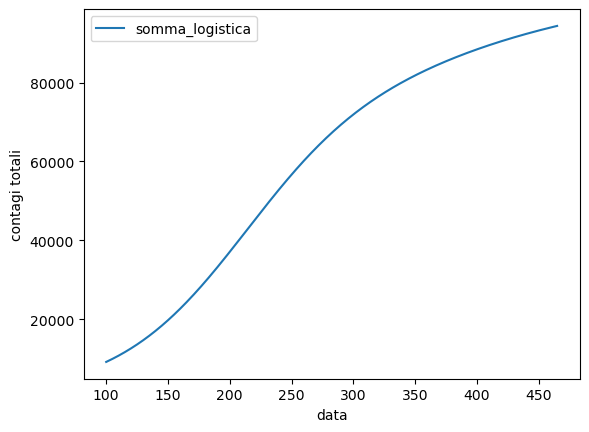

In [296]:
t=np.arange(100, 466, 1)
sommalo=somma_logistica (N_tot1L ,k1L, t01L, N_tot2L ,k2L, t02L, t)
#print(sommalo)
t=np.arange(100, 466, 1)
mpl.plot(t, sommalo, label='somma_logistica')
mpl.xlabel("data")
mpl.ylabel("contagi totali")
mpl.legend()

In [297]:
#somma di due gompertz

def somma_gompertz(N_tot1G ,k1G, t01G, N_tot2G ,k2G, t02G, t):
    gomp1=gompertz(N_tot1G ,k1G, t01G, t)
    gomp2=gompertz(N_tot2G ,k2G, t02G, t)
    somma_gomp= gomp1 + gomp2
    return somma_gomp

In [310]:
N_tot1G= tot_contagi1
k1G= 0.02
t01G=110
N_tot2G=tot_contagi2
k2G=0.01
t02G=270

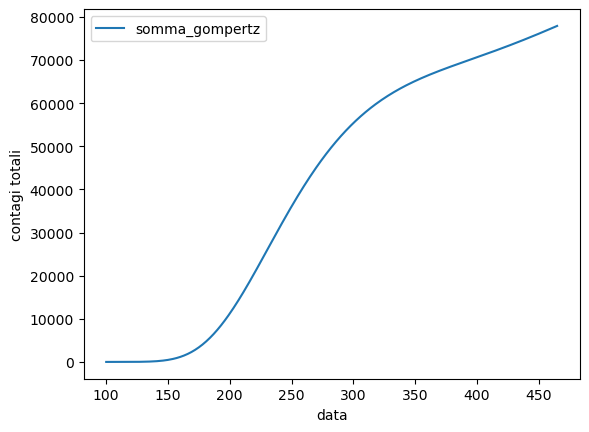

In [311]:
t=np.arange(100, 466, 1)
sommago=somma_gompertz (N_tot1G ,k1G, t01G, N_tot2G ,k2G, t02G, t)
#print(sommago)
t=np.arange(100, 466, 1)
mpl.plot(t, sommago, label='somma_gompertz')
mpl.xlabel("data")
mpl.ylabel("contagi totali")
mpl.legend()

Come si può notare, queste due funzioni sono sempre crescenti. Ciò è fondamentale dato che il numero dei contagiati, col passare delle giornate, può solo aumentare (non sono ammessi valori negativi dei nuovi contagi giornaleri, infatti questi ultimi non averebbero alcun senso).

Ora, invece, si definiscono le due funzioni che descriveranno il grafico dei nuovi contagiati in funzione della data. Analogamente a quanto detto sopra si definiscono le funzioni 'somma_new_logistica' e 'somma_new_gompertz' e le si graficano:

In [300]:
#somma di due new_logistica

def somma_new_logistica(N_tot1L ,k1L, t01L, N_tot2L ,k2L, t02L, t):
    new_logi1=new_logistica(N_tot1L ,k1L, t01L, t)
    new_logi2=new_logistica(N_tot2L ,k2L, t02L, t)
    new_somma_logi= new_logi1 + new_logi2
    return new_somma_logi

In [301]:
N_tot1L= tot_contagi1
k1L= 0.05
t01L=295
N_tot2L=tot_contagi2
k2L=0.09
t02L=385

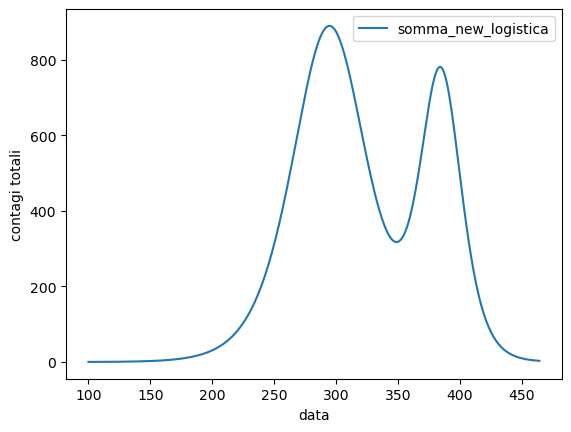

In [302]:
t=np.arange(100, 466, 1)
somma_new_lo= somma_new_logistica(N_tot1L ,k1L, t01L, N_tot2L ,k2L, t02L, t)
#print(somma_new_lo)
t=np.arange(100, 465, 1)
mpl.plot(t, somma_new_lo, label='somma_new_logistica' )
mpl.xlabel("data")
mpl.ylabel("contagi totali")
mpl.legend()

In [303]:
#somma di due new_gompertz

def somma_new_gompertz(N_tot1G ,k1G, t01G, N_tot2G ,k2G, t02G, t):
    new_gomp1=new_gompertz(N_tot1G ,k1G, t01G, t)
    new_gomp2=new_gompertz(N_tot2G ,k2G, t02G, t)
    new_somma_gomp= new_gomp1 + new_gomp2
    return new_somma_gomp

In [304]:
N_tot1G= tot_contagi1
k1G= 0.035
t01G=213
N_tot2G=tot_contagi2
k2G=0.06
t02G=350

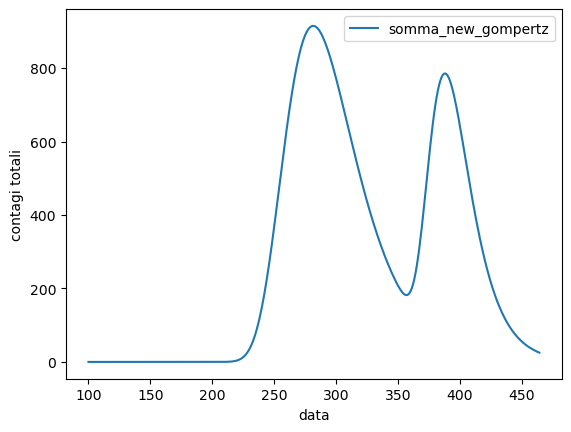

In [305]:
t=np.arange(100, 466, 1)
somma_new_go= somma_new_gompertz(N_tot1G ,k1G, t01G, N_tot2G ,k2G, t02G, t)
#print(somma_new_go)
t=np.arange(100, 465, 1)
mpl.plot(t, somma_new_go, label='somma_new_gompertz' )
mpl.xlabel("data")
mpl.ylabel("contagi totali")
mpl.legend()

Ora si sovrappone al grafico dei nuovi contagi giornalieri (nelle date richeste) l'andamento predetto dalla funzione 'somma_new_logistica' e successivamente con quello predetto dalla funzione 'somma_new_gompertz'. L'obbiettivo è quello di cercare in modo approssimato il valore dei parametri che andrebbero stimati analiticamente:

In [374]:
nuovi_posiFVG=dati_intervallo['nuovi_positivi'].to_numpy()   #trasformo la colonna del dataframe in un array
#print(nuovi_posiFVG)

#num_dati_intervallo= len(nuovi_posiFVG)       #conto il numero di dati
#print(num_dati_intervallo)

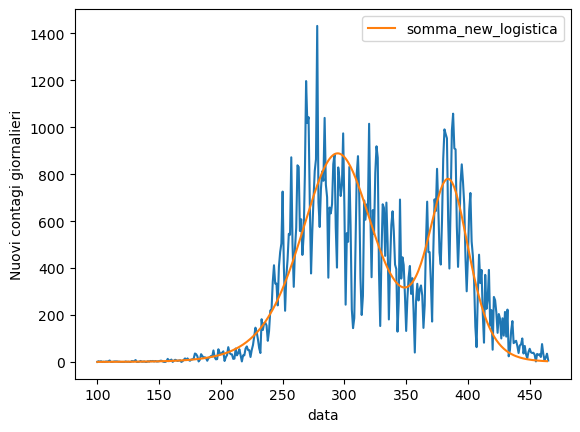

In [375]:
#grafico con funzione 'somma_new_logistica'
t=np.arange(100,466,1)                 #ho dovuto ridefinire t per avere la stessa dimesione
mpl.plot(t, nuovi_posiFVG)            #questo perchè usando le funzioni 'new_logistica' o 'new_gompertz' perdo l'ultimo dato alla fine
t=np.arange(100,465,1)
mpl.plot(t, somma_new_lo , label='somma_new_logistica'  )
mpl.xlabel("data")
mpl.ylabel("Nuovi contagi giornalieri")
mpl.legend()

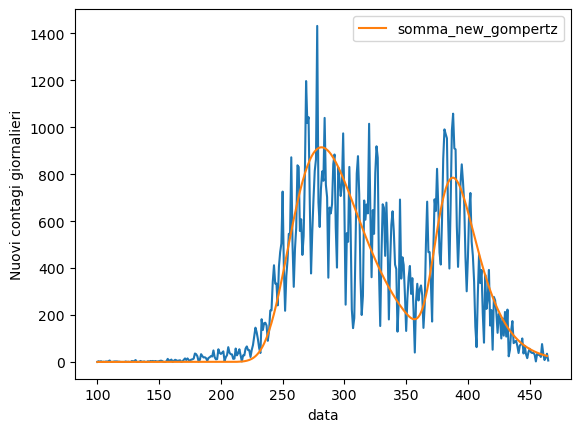

In [376]:
#grafico con funzione 'somma_new_gompertz'
t=np.arange(100,466,1)                 #ho dovuto ridefinire t per avere la stessa dimesione
mpl.plot(t, nuovi_posiFVG)            #questo perchè usando le funzioni 'new_logistica' o 'new_gompertz' perdo l'ultimo dato alla fine
t=np.arange(100,465,1)
mpl.plot(t, somma_new_go, label='somma_new_gompertz'   )
mpl.xlabel("data")
mpl.ylabel("Nuovi contagi giornalieri")
mpl.legend()

Ora inserisco entrambe le curve in un unico grafico per apprezzare meglio le differenze:

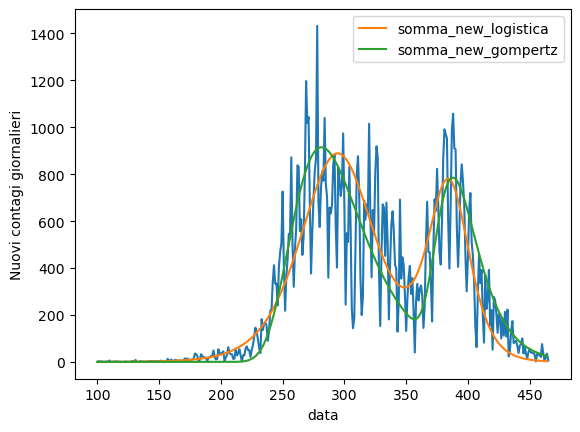

In [377]:
t=np.arange(100,466,1)               
mpl.plot(t, nuovi_posiFVG)           
t=np.arange(100,465,1)
mpl.plot(t, somma_new_lo, label='somma_new_logistica'  )
mpl.plot(t, somma_new_go, label='somma_new_gompertz'  )
mpl.xlabel("data")
mpl.ylabel("Nuovi contagi giornalieri")
mpl.legend()

Come si può notare, anche in questo caso, la funzione che sembra descrivere meglio il primo tratto è 'somma_new_logistica' mentre quella funzione che descrive meglio la discesa dei nuovi contagi giornalieri è 'somma_new_gompertz'. 
I grafici qua sopra sono stati ricavati sovrapponendo i dati osservati con le funzioni che descrivono il modello. I parametri che caratterizzano queste funzioni sono stati ricavati manualmente osservando il grafico: servono quindi a dare solamente un'idea del risultato che si otterebbe stimando i paramentri in modo analitico.

COMMENTO FINALE SU UNA POSSIBILE APPLICAZIONE: se si graficassero i nuovi contagi giornalieri di una data regione (in questo caso FVG) per tutto l'arco temporale di cui si hanno i dati si potrebbe notare che, col passare del tempo, si sono verificate più ondate epidemiche (ciascuna rappresentata da un picco principale nel grafico, considerando la regione FVG). Se, per ogni picco, si stimano i parametri della funzione 'new_logistica' oppure 'new_gompertz' si hanno più valori dei tre parametri che le caratterizzano (a diversi tempi). Questo consente di poter studiare il valore dei parametri in funzione della data (o del numero di ondata) per vedere se essi hanno un certo andamento nel tempo. Se si riuscisse ad evidenziare un certo andamento, si riuscirebbe a prevedere con più precisione gli effetti della pandemia anche nei mesi futuri e ciò consentirebbe di prendere o meno delle misure di precauzione in modo anticipato, limitando così la diffusione della malattia nei periodi in cui essa si sarebbe potuva sviluppare maggiormente. Inoltre, è anche possibile studiare il fenomeno in regioni differenti nello stesso arco temporale, per vedere come la pandemia si sviluppa nelle diverse regiorni d'Italia e per verficare a livello nazionale se un certo andamento ottenuto in un contesto più piccolo (es:regione FVG) viene rispettato. Ovviamente questa è una versione molto semplificata, perchè nella pratica bisognerebbe tenere conto di molte più variabili al fine di ottenere un risultato realistico.  